# What is the relationship between pre-existing health conditions and COVID-19?

**Considering:** Number of positive test cases and number of deaths associated with each condition

**Health Conditions:** Smoking, diabetes, cardiovascular disease, stroke

# **Data Setup and Cleaning:**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# creating the dataframes to work with

counties = pd.read_csv('abridged_couties.csv')
confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('time_series_covid19_deaths_US.csv')
states_april = pd.read_csv('4.18states.csv')

In [82]:
#cleaning data sets
states_april = states_april[['Province_State', 'Confirmed', 'Deaths', 'Active','People_Tested']]
states_april = states_april.fillna(0)
states_april.head()

,Province_State,Confirmed,Deaths,Active,People_Tested
0,Alabama,4712,153,4559.0,42538.0
1,Alaska,314,9,305.0,9655.0
2,American Samoa,0,0,0.0,3.0
3,Arizona,4724,180,4544.0,51045.0
4,Arkansas,1744,38,1706.0,24141.0


In [83]:
counties = counties[['CountyName', 'State', 'PopulationEstimate2018', 'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage']]
counties = counties[counties["State"].isnull() == False]
counties = counties.fillna(0)
counties.head()

,CountyName,State,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage
0,Autauga,Alabama,55601.0,9.9,204.5,56.1,18.081557
1,Baldwin,Alabama,218022.0,8.5,183.2,41.9,17.489033
2,Barbour,Alabama,24881.0,15.7,220.4,49.0,21.999985
3,Bibb,Alabama,22400.0,13.3,225.5,57.2,19.114200
4,Blount,Alabama,57840.0,14.9,224.8,52.8,19.208672


Find more information pertaining to the counties dataframe here: https://github.com/Yu-Group/covid19-severity-prediction/blob/master/data/list_of_columns.md

In [84]:
#Cleaning confirmed dataframe and grouping by state

confirmed = confirmed.dropna()
confirmed = confirmed.groupby(by="Province_State", as_index=False).mean()
confirmed = confirmed.drop(columns={"UID", "code3", "FIPS", "Lat", "Long_"})
confirmed.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,Alabama,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.173913,42.710145,46.623188,51.637681,54.115942,57.289855,59.057971,62.971014,66.246377,68.289855
1,Alaska,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.580645,7.935484,8.290323,8.774194,8.935484,9.193548,9.451613,9.677419,9.967742,10.129032
2,Arizona,0.0,0.0,0.0,0.0,0.058824,0.058824,0.058824,0.058824,0.058824,...,177.529412,183.058824,199.588235,208.352941,217.941176,224.058824,233.176471,249.235294,265.352941,277.882353
3,Arkansas,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.532468,15.207792,15.948052,16.623377,18.311688,19.454545,20.376623,21.038961,22.012987,22.649351
4,California,0.0,0.0,0.0,0.0,0.033333,0.033333,0.033333,0.033333,0.033333,...,328.500000,351.350000,361.766667,379.916667,398.850000,422.600000,444.766667,461.283333,485.950000,508.183333


In [85]:
#Cleaning deaths dataframe and grouping by state

deaths = deaths.dropna()
deaths = deaths.groupby(by="Province_State", as_index=False).mean()
deaths = deaths.drop(columns={"UID", "code3", "FIPS", "Lat", "Long_"})
deaths.head()

,Province_State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,Alabama,71060.652174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.014493,1.159420,1.333333,1.347826,1.434783,1.652174,1.710145,1.927536,2.144928,2.217391
1,Alaska,23598.225806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225806,0.225806,0.258065,0.258065,0.258065,0.290323,0.290323,0.290323,0.290323,0.290323
2,Arizona,428159.823529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.235294,5.705882,6.352941,6.764706,7.176471,7.705882,8.352941,8.823529,9.941176,10.588235
3,Arkansas,39192.259740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.272727,0.272727,0.324675,0.350649,0.376623,0.415584,0.428571,0.480519,0.480519,0.493506
4,California,658537.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.066667,9.716667,10.066667,10.666667,11.900000,12.783333,14.333333,15.933333,17.283333,19.000000


# **Exploratory Data Analysis (EDA):**

## **Exploring death rates and positive test rates in different states.**

In [86]:
#Finding the death rates and positive rates for each state in the US

explore = counties[["CountyName", "State"]]
explore = explore.dropna()
explore = explore.groupby(by="State", as_index=False).count()
explore = explore.merge(states_april, left_on='State', right_on='Province_State')
explore = explore[["State", "Confirmed", "Deaths", "People_Tested"]]
explore["Death_Rate"] = (explore["Deaths"] / explore["Confirmed"]) * 100
explore["Positive_Rate"] = (explore["Confirmed"] / explore["People_Tested"]) * 100
explore = explore.drop(columns=["Confirmed", "Deaths", "People_Tested"])
explore.head()

,State,Death_Rate,Positive_Rate
0,Alabama,3.247029,11.077155
1,Arizona,3.810330,9.254579
2,Arkansas,2.178899,7.224224
3,California,3.738808,12.118165
4,Colorado,4.299768,20.890387


In [87]:
#Let's visualize the death and positive rates according to states

import plotly.express as px

fig = px.scatter(explore, x="Death_Rate", y="Positive_Rate", text=explore["State"])

fig.update_traces(textposition='top center')

fig.update_layout(height=800, title_text='US States and Death/Positive Rates')

fig.show()

The plot aligns with the early spread of the virus and high number of cases in the tri-state area, i.e. New York, New Jersey, and Connecticut, and also in the state of Michigan.

In [88]:
highest_death_rate = max(explore["Death_Rate"])
highest_death_rate_state = explore["State"][explore["State"].index == np.argmax(explore["Death_Rate"])].to_list()
print("The highest Death Rate is", highest_death_rate, "in the state of", *highest_death_rate_state)

The highest Death Rate is 7.495696794517878 in the state of Michigan


/srv/conda/envs/data100/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



In [89]:
lowest_death_rate = min(explore["Death_Rate"])
lowest_death_rate_state = explore["State"][explore["State"].index == np.argmin(explore["Death_Rate"])].to_list()
print("The lowest Death Rate is", lowest_death_rate, "in the state of", *lowest_death_rate_state)

The lowest Death Rate is 0.4539559014267186 in the state of South Dakota


/srv/conda/envs/data100/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning:


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.



In [90]:
highest_positive_rate = max(explore["Positive_Rate"])
highest_positive_rate_state = explore["State"][explore["State"].index == np.argmax(explore["Positive_Rate"])].to_list()
print("The highest Positive Test Rate is", highest_positive_rate, "in the state of", *highest_positive_rate_state)

The highest Positive Test Rate is 50.09351774376138 in the state of New Jersey


In [91]:
lowest_positive_rate = min(explore["Positive_Rate"])
lowest_positive_rate_state = explore["State"][explore["State"].index == np.argmin(explore["Positive_Rate"])].to_list()
print("The lowest Positive Test Rate is", lowest_positive_rate, "in the state of", *lowest_positive_rate_state)

The lowest Positive Test Rate is 4.030655691172296 in the state of Montana


## **1. The impact of smoking on the death rate and the positive test rate.**

In [92]:
impact_smoking = counties[["CountyName", "State", "Smokers_Percentage"]]
impact_smoking = impact_smoking.dropna()
impact_smoking = impact_smoking[impact_smoking["Smokers_Percentage"] > 0]
impact_smoking.sort_values(by=["Smokers_Percentage"], ascending=False).head()

,CountyName,State,Smokers_Percentage
2418,Todd,South Dakota,41.491309
2029,Sioux,North Dakota,38.704763
2026,Rolette,North Dakota,37.579005
2366,Buffalo,South Dakota,36.013490
3086,Menominee,Wisconsin,33.580000


In [93]:
#We are grouping by state because the county data is not available in the other spreadsheet

impact_smoking = impact_smoking.groupby(by="State", as_index=False).mean()
impact_smoking.sort_values(by=["Smokers_Percentage"], ascending=False).head()

,State,Smokers_Percentage
46,West Virginia,22.882623
40,Tennessee,22.344046
15,Kentucky,22.291081
16,Louisiana,21.792924
23,Missouri,20.460137


In [94]:
impact_smoking = impact_smoking.merge(states_april, left_on='State', right_on='Province_State')
impact_smoking = impact_smoking[["State", "Smokers_Percentage", "Confirmed", "Deaths", "People_Tested"]]
impact_smoking["Death_Rate"] = (impact_smoking["Deaths"] / impact_smoking["Confirmed"]) * 100
impact_smoking["Positive_Rate"] = (impact_smoking["Confirmed"] / impact_smoking["People_Tested"]) * 100
impact_smoking = impact_smoking.drop(columns=["Confirmed", "Deaths", "People_Tested"])
impact_smoking.sort_values(by=["Smokers_Percentage"], ascending=False).head()

,State,Smokers_Percentage,Death_Rate,Positive_Rate
45,West Virginia,22.882623,2.038217,4.038066
39,Tennessee,22.344046,2.155107,7.273751
14,Kentucky,22.291081,5.319542,8.847562
15,Louisiana,21.792924,5.373198,17.087080
22,Missouri,20.460137,3.531099,10.377797


In [95]:
#Finding correlation between state's smoking percentage vs their death rate

smoking_correlation_death = impact_smoking["Smokers_Percentage"].corr(impact_smoking["Death_Rate"])
print("The correlation is", smoking_correlation_death)

The correlation is 0.00875390226749109


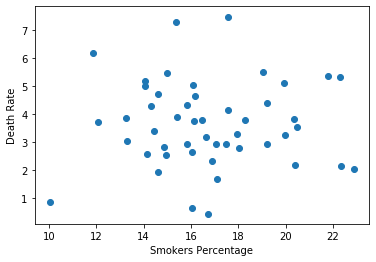

In [96]:
plt.scatter(impact_smoking["Smokers_Percentage"], impact_smoking["Death_Rate"])
plt.xlabel('Smokers Percentage')
plt.ylabel('Death Rate')
plt.show()

In [97]:
#Finding correlation between state's smoking percentage vs their positive rate

smoking_correlation_positve = impact_smoking["Smokers_Percentage"].corr(impact_smoking["Positive_Rate"])
print("The correlation is", smoking_correlation_positve)

The correlation is -0.2123969713119242


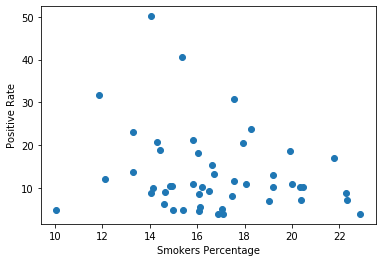

In [98]:
plt.scatter(impact_smoking["Smokers_Percentage"], impact_smoking["Positive_Rate"])
plt.xlabel('Smokers Percentage')
plt.ylabel('Positive Rate')
plt.show()

Conclusion:

The correlation between smoking percentage and the death rate came out to be positive but the number was very small. However, the state with the lowest death rate is South Dakota, which has 2 counties in the top 4 counties with the highest smoking percentages. 

The correlation between smoking percentage and the positive rate came out to be negative and small. However, this might suggest that smoking does in fact bring down the number of positive cases.

This suggests that if we had the data for the death rate according to counties, we could potentially find a negative correlation between smoking and falling sick with the coronavirus.

## **2. The impact of diabetes on the death rate and the positive test rate.**


In [99]:
impact_diabetes = counties[["CountyName", "State", "DiabetesPercentage"]]
impact_diabetes = impact_diabetes.dropna()
impact_diabetes = impact_diabetes[impact_diabetes["DiabetesPercentage"] > 0]
impact_diabetes.sort_values(by=["DiabetesPercentage"], ascending=False).head()

,CountyName,State,DiabetesPercentage
1466,Tippah,Mississippi,33.0
469,Lanier,Georgia,32.3
542,Worth,Georgia,29.8
1938,Jones,North Carolina,27.2
2747,Trinity,Texas,26.8


In [100]:
#We are grouping by state because the county data is not available in the other spreadsheet
#Observe the sharp decrease in % when doing this; Tippah County of MS is 33% but the entire state averages to be <15%

impact_diabetes = impact_diabetes.groupby(by="State", as_index=False).mean()
impact_diabetes.sort_values(by=["DiabetesPercentage"], ascending=False).head()

,State,DiabetesPercentage
22,Mississippi,14.456098
0,Alabama,14.407463
2,Arkansas,13.432000
38,South Carolina,13.267391
16,Louisiana,13.232812


In [101]:
impact_diabetes = impact_diabetes.merge(states_april, left_on='State', right_on='Province_State')
impact_diabetes = impact_diabetes[["State", "DiabetesPercentage", "Confirmed", "Deaths", "People_Tested"]]
impact_diabetes["Death_Rate"] = (impact_diabetes["Deaths"] / impact_diabetes["Confirmed"]) * 100
impact_diabetes["Positive_Rate"] = (impact_diabetes["Confirmed"] / impact_diabetes["People_Tested"]) * 100
impact_diabetes = impact_diabetes.drop(columns=["Confirmed", "Deaths", "People_Tested"])
impact_diabetes.sort_values(by=["DiabetesPercentage"], ascending=False).head()

,State,DiabetesPercentage,Death_Rate,Positive_Rate
21,Mississippi,14.456098,3.824862,10.251516
0,Alabama,14.407463,3.247029,11.077155
2,Arkansas,13.432000,2.178899,7.224224
37,South Carolina,13.267391,2.801318,10.939150
15,Louisiana,13.232812,5.373198,17.087080


In [102]:
#Finding correlation between state's diabetes percentage vs their death rate

diabetes_correlation_death = impact_diabetes["DiabetesPercentage"].corr(impact_diabetes["Death_Rate"])
print("The correlation is:", diabetes_correlation_death)

The correlation is: -0.0075844950723966895


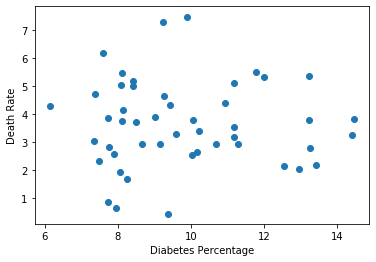

In [103]:
plt.scatter(impact_diabetes["DiabetesPercentage"], impact_diabetes["Death_Rate"])
plt.xlabel('Diabetes Percentage')
plt.ylabel('Death Rate')
plt.show()

In [104]:
#Finding correlation between state's diabetes percentage vs their positive rate

smoking_correlation_positve = impact_diabetes["DiabetesPercentage"].corr(impact_diabetes["Positive_Rate"])
print("The correlation is:", smoking_correlation_positve)

The correlation is: -0.07202129942615186


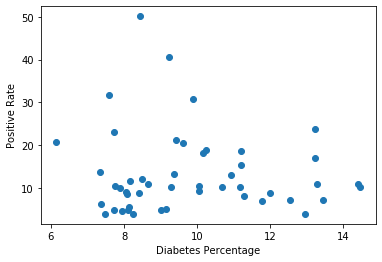

In [105]:
plt.scatter(impact_diabetes["DiabetesPercentage"], impact_diabetes["Positive_Rate"])
plt.xlabel('Diabetes Percentage')
plt.ylabel('Positive Rate')
plt.show()

Conclusion:

The correlation between diabetes percentage and the death rate came out to be negative but the number was very small.

The correlation between diabetes percentage and the positive rate came out to be negative and small. This result is kind of surprising but at the same time not significant enough to make a conclusion.

## **3. The impact of heart disease on the death rate and the positive test rate.**

In [106]:
impact_heart = counties[["CountyName", "State", "HeartDiseaseMortality"]]
impact_heart = impact_heart.dropna()
impact_heart = impact_heart[impact_heart["HeartDiseaseMortality"] > 0]
impact_heart.sort_values(by=["HeartDiseaseMortality"], ascending=False).head()

,CountyName,State,HeartDiseaseMortality
1129,Franklin,Louisiana,603.0
1119,Caldwell,Louisiana,418.1
1588,Washington,Missouri,402.5
2029,Sioux,North Dakota,381.0
1001,Breathitt,Kentucky,376.0


In [107]:
#We are grouping by state because the county data is not available in the other spreadsheet

impact_heart = impact_heart.groupby(by="State", as_index=False).mean()
impact_heart.sort_values(by=["HeartDiseaseMortality"], ascending=False).head()

,State,HeartDiseaseMortality
22,Mississippi,247.858537
0,Alabama,243.595522
34,Oklahoma,242.615584
16,Louisiana,241.418750
2,Arkansas,235.172000


In [108]:
impact_heart = impact_heart.merge(states_april, left_on='State', right_on='Province_State')
impact_heart = impact_heart[["State", "HeartDiseaseMortality", "Confirmed", "Deaths", "People_Tested"]]
impact_heart["Death_Rate"] = (impact_heart["Deaths"] / impact_heart["Confirmed"]) * 100
impact_heart["Positive_Rate"] = (impact_heart["Confirmed"] / impact_heart["People_Tested"]) * 100
impact_heart = impact_heart.drop(columns=["Confirmed", "Deaths", "People_Tested"])
impact_heart.sort_values(by=["HeartDiseaseMortality"], ascending=False).head()

,State,HeartDiseaseMortality,Death_Rate,Positive_Rate
21,Mississippi,247.858537,3.824862,10.251516
0,Alabama,243.595522,3.247029,11.077155
33,Oklahoma,242.615584,5.517241,6.936628
15,Louisiana,241.418750,5.373198,17.087080
2,Arkansas,235.172000,2.178899,7.224224


In [109]:
#Finding correlation between state's heart disease mortality vs their death rate

heart_correlation_death = impact_heart["HeartDiseaseMortality"].corr(impact_heart["Death_Rate"])
print("The correlation is:", heart_correlation_death)

The correlation is: 0.10321854037569485


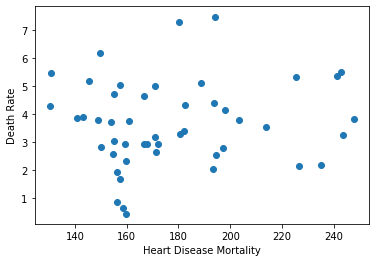

In [110]:
plt.scatter(impact_heart["HeartDiseaseMortality"], impact_heart["Death_Rate"])
plt.xlabel('Heart Disease Mortality')
plt.ylabel('Death Rate')
plt.show()

In [111]:
#Finding correlation between state's heart rate mortality vs their positive rate

heart_correlation_positve = impact_heart["HeartDiseaseMortality"].corr(impact_heart["Positive_Rate"])
print("The correlation is:", heart_correlation_positve)

The correlation is: 0.0018862240027487298


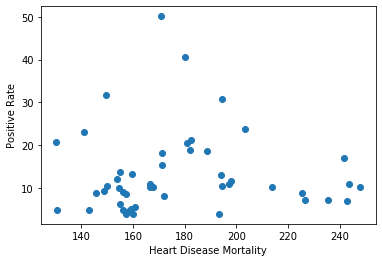

In [112]:
plt.scatter(impact_heart["HeartDiseaseMortality"], impact_heart["Positive_Rate"])
plt.xlabel('Heart Disease Mortality')
plt.ylabel('Positive Rate')
plt.show()

Conclusion:

The correlation between heart rate mortality and the death rate came out to be positive, which is not surprising as people with heart disease are more suceptible to the virus.

The correlation between heart rate mortality and the positive rate came out to be positive but small and insignificant.

## **4. The impact of stroke mortality on the death rate and the positive test rate.**

In [113]:
impact_stroke = counties[["CountyName", "State", "StrokeMortality"]]
impact_stroke = impact_stroke.dropna()
impact_stroke = impact_stroke[impact_stroke["StrokeMortality"] > 0]
impact_stroke.sort_values(by=["StrokeMortality"], ascending=False).head()

,CountyName,State,StrokeMortality
2522,Angelina,Texas,99.9
1919,Edgecombe,North Carolina,92.3
953,Osage,Kansas,84.1
2328,Darlington,South Carolina,76.3
534,Wayne,Georgia,72.1


In [114]:
#We are grouping by state because the county data is not available in the other spreadsheet

impact_stroke = impact_stroke.groupby(by="State", as_index=False).mean()
impact_stroke.sort_values(by=["StrokeMortality"], ascending=False).head()

,State,StrokeMortality
22,Mississippi,51.717073
0,Alabama,51.450746
38,South Carolina,49.047826
2,Arkansas,47.681333
16,Louisiana,47.168750


In [115]:
impact_stroke = impact_stroke.merge(states_april, left_on='State', right_on='Province_State')
impact_stroke = impact_stroke[["State", "StrokeMortality", "Confirmed", "Deaths", "People_Tested"]]
impact_stroke["Death_Rate"] = (impact_stroke["Deaths"] / impact_stroke["Confirmed"]) * 100
impact_stroke["Positive_Rate"] = (impact_stroke["Confirmed"] / impact_stroke["People_Tested"]) * 100
impact_stroke = impact_stroke.drop(columns=["Confirmed", "Deaths", "People_Tested"])
impact_stroke.sort_values(by=["StrokeMortality"], ascending=False).head()

,State,StrokeMortality,Death_Rate,Positive_Rate
21,Mississippi,51.717073,3.824862,10.251516
0,Alabama,51.450746,3.247029,11.077155
37,South Carolina,49.047826,2.801318,10.939150
2,Arkansas,47.681333,2.178899,7.224224
15,Louisiana,47.168750,5.373198,17.087080


In [116]:
#Finding correlation between state's stroke mortality vs their death rate

stroke_correlation_death = impact_stroke["StrokeMortality"].corr(impact_stroke["Death_Rate"])
print("The correlation is:", stroke_correlation_death)

The correlation is: -0.1015247462716252


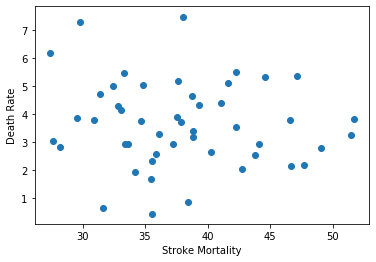

In [117]:
plt.scatter(impact_stroke["StrokeMortality"], impact_stroke["Death_Rate"])
plt.xlabel('Stroke Mortality')
plt.ylabel('Death Rate')
plt.show()

In [118]:
#Finding correlation between state's stroke mortality vs their positive test rate

stroke_correlation_positve = impact_stroke["StrokeMortality"].corr(impact_stroke["Positive_Rate"])
print("The correlation is:", stroke_correlation_positve)

The correlation is: -0.2144216082835535


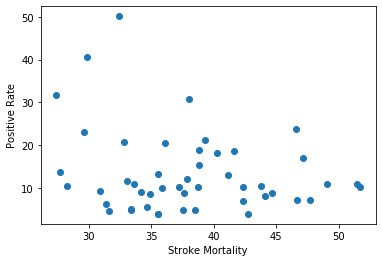

In [119]:
plt.scatter(impact_stroke["StrokeMortality"], impact_stroke["Positive_Rate"])
plt.xlabel('Stroke Mortality')
plt.ylabel('Positive Rate')
plt.show()

Conclusion:

The correlation between stroke mortality and the death rate came out to be negative surprisingly.

The correlation between stroke mortality and the positive rate came out to be negative surprisingly.

This surprise result could be because of the fact that stroke mortality rates are from 2014-2016 and not live data as young COVID-19 patients are suffering and dying from stroke.

# **Modeling:**

Observing the EDA above, we can see that there are clearly some certain health conditions that potentially demonstrate a higher likelihood of contracting COVID-19. This is demonstrated by the greater absolute value of correlation.

## **Modeling the Relationship between Stroke and Smoking with Testing Positive for COVID-19**

Two conditions that clearly stick out considering the Positive Rate value are Stroke and Smoking. Below we construct a model to try to predict whether an individual has a higher likelihood of testing positive COVID-19. We first begin by merging the tables created in the EDA section for the Impact of Stroke and the Impact of Smoking.

In [120]:
impact_stroke_smoking = impact_stroke.merge(impact_smoking, on='State')[['State', 'StrokeMortality', 'Smokers_Percentage', 'Positive_Rate_x']]
impact_stroke_smoking.head()

,State,StrokeMortality,Smokers_Percentage,Positive_Rate_x
0,Alabama,51.450746,19.989231,11.077155
1,Arizona,30.900000,16.483911,9.254579
2,Arkansas,47.681333,20.388849,7.224224
3,California,37.891379,12.091600,12.118165
4,Colorado,32.851562,14.297498,20.890387


We then extract the two covariates we hope to use to build our model, which in this case are simply the StrokeMortality and Smokers_Percentage. We assign this reduced dataframe to the value X.
We then assign Y to an array representing the corresponding Positive Rate values for each state.

In [121]:
X_positive = impact_stroke_smoking[['StrokeMortality', 'Smokers_Percentage']]
X_positive.head()

,StrokeMortality,Smokers_Percentage
0,51.450746,19.989231
1,30.900000,16.483911
2,47.681333,20.388849
3,37.891379,12.091600
4,32.851562,14.297498


In [122]:
Y_positive = np.array(impact_stroke_smoking['Positive_Rate_x'])
Y_positive

array([11.07715454,  9.25457929,  7.22422435, 12.11816513, 20.89038724,
       31.6432873 , 18.10658486, 10.34044952, 23.81010134,  9.96447709,
       21.2220896 , 18.71010849, 10.95132261, 10.30210455,  8.84756177,
       17.08708034,  5.67580245, 18.85574423, 23.19554099, 30.87528954,
        4.99006054, 10.25151554, 10.37779721,  4.03065569,  9.13211962,
       11.79148646, 10.44195456, 50.09351774,  5.04871816, 40.51953625,
        8.30326331,  4.07313122, 12.97899896,  6.93662765,  4.90647367,
       20.55791901, 13.68122829, 10.93914969, 13.22469983,  7.27375091,
       10.61286094,  4.86620846,  6.39025943, 15.50711521,  8.94649274,
        4.03806584,  8.71867279,  4.73781049])

We perform a train-test split below.

In [123]:
from sklearn.model_selection import train_test_split

np.random.seed(41)
X_positive_train, X_positive_test, Y_positive_train, Y_positive_test = train_test_split(X_positive, Y_positive, test_size = 0.10)

We can now start building our model. We use a linear model because the values of data we are using here are continuous in nature, not categorical.

In [124]:
from sklearn import linear_model as lm

linear_model_positive = lm.LinearRegression(fit_intercept=True)
linear_model_positive.fit(X_positive_train, Y_positive_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's then compute both the fitted and the predicted values of the training subset of data.

In [125]:
linear_model_positive.predict(X_positive_train)

array([14.5540031 , 11.43674592, 11.97812257, 13.37560695, 12.08113247,
       16.54422809, 13.34056086, 11.28265813, 15.63844288,  9.67138763,
        9.60968126, 14.79869014, 14.79838622, 14.95406464, 13.26914168,
       12.67332026, 13.16533651, 16.25758839, 10.2952923 ,  9.45955772,
       14.11237447, 11.51068877, 13.33233425, 14.40904695, 11.56135903,
       11.15378776, 14.50103677, 13.40717057, 10.82791618, 14.41492807,
       13.17095857, 13.72213538, 15.33252714, 15.02025959,  9.8924214 ,
       13.27617057, 13.20530001, 13.94834168, 13.72375592, 13.76276098,
       13.97136094, 12.69714262, 10.09116808])

Compare the model with the actual data using the RMSE function.

In [126]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

In [127]:
rmse(linear_model_positive.predict(X_positive_train), Y_positive_train)

8.71538802352272

The RMSE value is apporixmately 8.72 which we will later interpret and compare against the RMSE value of the other model to follow.

Below, we create a regression plot visualization using seaborn. If the result of the plot is a horizontal line of points at 0, this means that the prediction is perfectly correlated. However, the plot is clearly not close to this perfect situation.

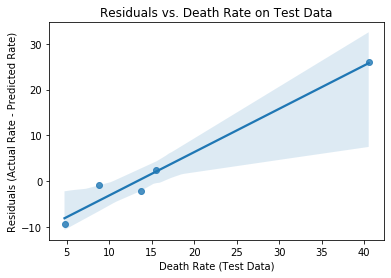

In [128]:
import seaborn as sns

#We would hope to see a horizontal line of points at 0.

residuals = Y_positive_test - linear_model_positive.predict(X_positive_test)
ax = sns.regplot(Y_positive_test, residuals)
ax.set_xlabel('Death Rate (Test Data)')
ax.set_ylabel('Residuals (Actual Rate - Predicted Rate)')
ax.set_title("Residuals vs. Death Rate on Test Data");

Conclusion: This model seems to demonstrate a poor prediction of correlation. Let us then observe the relationship between Heart Disease and Stroke with the chance of dying from COVID-19.

## **Modeling the Relationship between Heart Disease and Stroke with Dying from COVID-19**

We will now build a model using the two health conditions with the most impactful correlation value to the death rate of COVID-19. These conditions are Heart Disease and Stroke. We again begin by merging the tables created in the EDA section for the Impact of Stroke and the Impact of Heart Disease, focusing now on the Death Rate instead of the Positive Test percentage.

In [129]:
impact_stroke_heart = impact_stroke.merge(impact_heart, on='State')[['State', 'StrokeMortality', 'HeartDiseaseMortality', 'Death_Rate_x']]
impact_stroke_heart.head()

,State,StrokeMortality,HeartDiseaseMortality,Death_Rate_x
0,Alabama,51.450746,243.595522,3.247029
1,Arizona,30.900000,148.826667,3.810330
2,Arkansas,47.681333,235.172000,2.178899
3,California,37.891379,153.908621,3.738808
4,Colorado,32.851562,130.337500,4.299768


We then extract the two covariates we hope to use to build our model, which in this case are the StrokeMortality and HeartDiseaseMortality. We assign this reduced dataframe to the value X. We then assign Y to an array representing the corresponding Date Rate values for each state.

In [130]:
X_death = impact_stroke_heart[['StrokeMortality', 'HeartDiseaseMortality']]
X_death.head()

,StrokeMortality,HeartDiseaseMortality
0,51.450746,243.595522
1,30.900000,148.826667
2,47.681333,235.172000
3,37.891379,153.908621
4,32.851562,130.337500


In [131]:
Y_death = np.array(impact_stroke_heart['Death_Rate_x'])
Y_death

array([3.24702886, 3.81033023, 2.17889908, 3.73880817, 4.29976788,
       6.18803419, 2.63987392, 2.93425388, 3.8089309 , 2.59818731,
       4.3175583 , 5.12169909, 2.94468762, 4.66776496, 5.31954193,
       5.37319763, 3.77804014, 3.41554438, 3.86011217, 7.49569679,
       5.47759167, 3.8248616 , 3.53109876, 2.34741784, 1.92153723,
       4.16436845, 2.83159463, 4.9987718 , 2.94771969, 7.31076653,
       2.9551201 , 1.70454545, 4.41205244, 5.51724138, 3.90455531,
       3.29205106, 3.05054554, 2.80131827, 0.4539559 , 2.155107  ,
       2.54491018, 0.85704491, 4.73225405, 3.20377499, 5.20550272,
       2.03821656, 5.04882115, 0.64724919])

We perform a train-test split below.

In [132]:
np.random.seed(41)
X_death_train, X_death_test, Y_death_train, Y_death_test = train_test_split(X_death, Y_death, test_size = 0.10)

Let's take another look at X_death.

In [133]:
X_death.head()

,StrokeMortality,HeartDiseaseMortality
0,51.450746,243.595522
1,30.900000,148.826667
2,47.681333,235.172000
3,37.891379,153.908621
4,32.851562,130.337500


There is a key issue here: the range of HeartDiseaseMorality values is considerably greater than that of the StrokeMortality column. Therefore, we will normalize the data using the function written below.

In [134]:
def normalize(data):

    output = (data - np.mean(data))/np.std(data)
    return output.replace(np.nan, 0)
    
X_normalized = normalize(X_death_train)
X_normalized.head()

,StrokeMortality,HeartDiseaseMortality
9,-0.421362,-0.731426
8,1.365115,0.813343
7,-0.198223,-0.316826
10,0.153105,0.145569
30,0.947855,-0.180662


We can now build a linear model because the values of data are continuous, not categorical.

In [135]:
linear_model_death = lm.LinearRegression(fit_intercept=True)
linear_model_death.fit(normalize(X_death_train), Y_death_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's then compute both the fitted and the predicted values of the training subset of data.

In [136]:
linear_model_death.predict(normalize(X_death_train))

array([3.46220334, 3.16032728, 3.5687573 , 3.61261517, 2.81872223,
       4.38792488, 3.59985028, 2.73420408, 3.94081903, 3.87485485,
       3.41736583, 4.01106084, 3.32429171, 4.2140195 , 3.35894888,
       4.01305121, 3.55701167, 3.1739369 , 3.68344045, 3.62890312,
       3.66994017, 4.49083407, 3.31545872, 3.05778974, 3.63131047,
       3.46103523, 3.69929721, 3.85866328, 3.89783579, 3.27456579,
       3.26797968, 3.63981956, 3.19737566, 4.29411408, 3.4540124 ,
       3.61073748, 4.69172615, 3.94373789, 3.72916341, 3.01089851,
       3.97982372, 3.96923833, 3.39840775])

In [137]:
rmse(linear_model_death.predict(normalize(X_death_train)), Y_death_train)

1.3330380185565134

Again, we will create a seaborn regression plot visualization to analyze the relationship between the residuals and the death rate based on test data for the death rate subset.

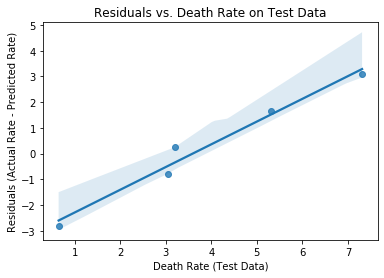

In [138]:
#Ideally, we would see a horizontal line of points at 0.

residuals = Y_death_test - linear_model_death.predict(normalize(X_death_test))
ax = sns.regplot(Y_death_test, residuals)
ax.set_xlabel('Death Rate (Test Data)')
ax.set_ylabel('Residuals (Actual Rate - Predicted Rate)')
ax.set_title("Residuals vs. Death Rate on Test Data");

Again, because the line is not horizontal at 0, this shows that the model does not do a great job predicting the death rate of those who have COVID-19 given the two chosen pre-existing health conditions.

The resulting rmse for the death rate linear model is approximately 1.33.
This is considerably lower than the rmse value for the positive rate linear model which is 8.71. However, note that these two models are predicting two very different things. Now, let's look at the test rmse values for each model.

In [139]:
Positive_Rate_Test_RMSE = rmse(linear_model_positive.predict(X_positive_test), Y_positive_test)
Death_Rate_Test_RMSE = rmse(linear_model_death.predict(normalize(X_death_test)), Y_death_test)

print("The Positive Rate Test RMSE is {}".format(Positive_Rate_Test_RMSE))
print("The Death Rate Test RMSE is {}".format(Death_Rate_Test_RMSE))

The Positive Rate Test RMSE is 12.415774235660875
The Death Rate Test RMSE is 2.040475048553118


As shown, the Death Rate RMSE on the test set of data for the two chosen health condition covariates is significantly lower than that of the Positive Rate RMSE. To observe this difference further, let's compare the R^2 scores for both models.

Below, compare the R^2 score for each model we built. This will help us observe the goodness of fit of the model on a scale from 0-1.

In [140]:
#Best possible value is 1.0 as r^2 measures goodness of fit

from sklearn.metrics import r2_score

Positive_Rate_Test_R2 = r2_score(Y_positive_test, linear_model_positive.predict(X_positive_test))
Death_Rate_Test_R2 = r2_score(Y_death_test, linear_model_death.predict(normalize(X_death_test)))

print("The Positive Rate Test R^2 is {}".format(Positive_Rate_Test_R2))
print("The Death Rate Test R^2 is {}".format(Death_Rate_Test_R2))

The Positive Rate Test R^2 is 0.015198609973639088
The Death Rate Test R^2 is 0.18153087414541635


Conclusion: The models we built above are far from perfect in their ability to predict whether an individual has a higher likelihood of testing positive or dying from COVID-19 given selected pre-existing health conditions. However, these models are not entirely imperfect either. For instance, the R^2 value of 0.18 demonstrates that some part of the death rate can be explained using pre-existing conditions.
